In [25]:
import pandas as pd
import numpy as np
import random

# generate delay 1–6 untuk 153 rows
delay_days = np.random.randint(1, 7, (153,))

states = ["Selangor","Kuala Lumpur","Johor","Penang","Perak"]
couriers = ["Shopee Express","J&T","Poslaju"]
hubs = ["Puchong Hub","KL Hub","JB Hub"]

data = []

for i in range(len(delay_days)):   # guna len() bukan rows
    order_id = f"MY{900000+i}"
    state = random.choice(states)
    courier = random.choice(couriers)
    shipped_date = f"2025-01-{random.randint(1, 28)}"
    delivered_date = f"2025-01-{random.randint(1, 28)}"
    hub = random.choice(hubs)
    complaint = "Yes" if delay_days[i] > 2 else "No"

    data.append([
        order_id, state, courier, shipped_date,
        delivered_date, delay_days[i], hub, complaint
    ])

df = pd.DataFrame(data, columns=[
    "order_id","state","courier","shipped_date",
    "delivered_date","delay_days","hub_location","complaint"
])

# SIMPAN CSV
df.to_csv("shopee_dataset_final.csv")
df

,order_id,state,courier,shipped_date,delivered_date,delay_days,hub_location,complaint
0,MY900000,Perak,Shopee Express,2025-01-12,2025-01-11,6,Puchong Hub,Yes
1,MY900001,Selangor,Poslaju,2025-01-10,2025-01-6,2,JB Hub,No
2,MY900002,Johor,Poslaju,2025-01-11,2025-01-18,4,KL Hub,Yes
3,MY900003,Selangor,J&T,2025-01-25,2025-01-26,6,KL Hub,Yes
4,MY900004,Selangor,Shopee Express,2025-01-4,2025-01-2,2,Puchong Hub,No
...,...,...,...,...,...,...,...,...
148,MY900148,Kuala Lumpur,Shopee Express,2025-01-20,2025-01-20,5,Puchong Hub,Yes
149,MY900149,Kuala Lumpur,J&T,2025-01-25,2025-01-16,6,Puchong Hub,Yes
150,MY900150,Johor,Poslaju,2025-01-3,2025-01-17,3,KL Hub,Yes
151,MY900151,Penang,Poslaju,2025-01-16,2025-01-2,4,Puchong Hub,Yes


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        153 non-null    object
 1   state           153 non-null    object
 2   courier         153 non-null    object
 3   shipped_date    153 non-null    object
 4   delivered_date  153 non-null    object
 5   delay_days      153 non-null    int32 
 6   hub_location    153 non-null    object
 7   complaint       153 non-null    object
dtypes: int32(1), object(7)
memory usage: 9.1+ KB


In [10]:
df.shape


(153, 8)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# baca dataset
df = pd.read_csv("shopee_dataset_final.csv")


Text(0, 0.5, 'Count')

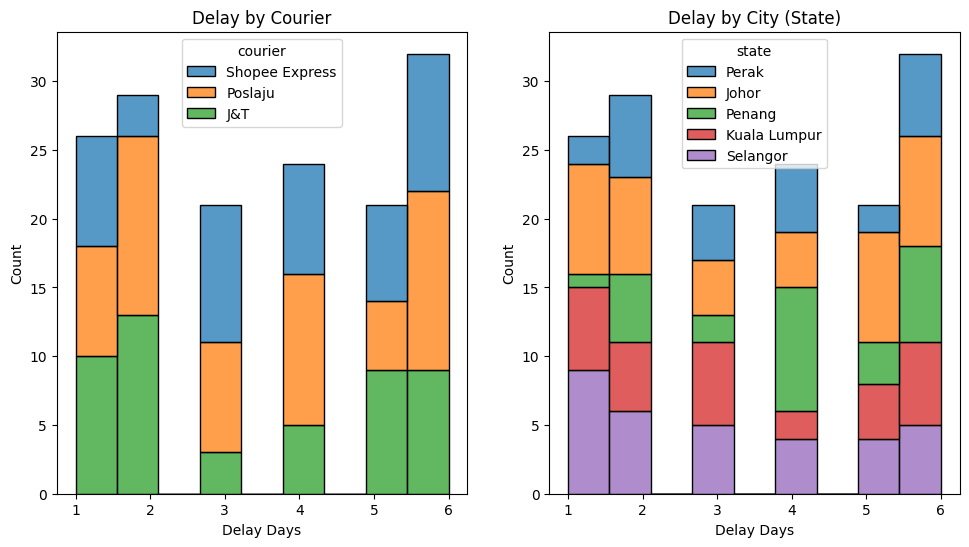

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("shopee_dataset_final.csv")

plt.figure(figsize=(18,6))

# ========== 1) Histogram Delay by Courier ==========
plt.subplot(1,3,1)
sns.histplot(
    data=df,
    x="delay_days",
    hue="courier",
    multiple="stack"
)
plt.title("Delay by Courier")
plt.xlabel("Delay Days")
plt.ylabel("Count")

# ========== 2) Histogram Delay by City (State) ==========
plt.subplot(1,3,2)
sns.histplot(
    data=df,
    x="delay_days",
    hue="state",
    multiple="stack"
)
plt.title("Delay by City (State)")
plt.xlabel("Delay Days")
plt.ylabel("Count")




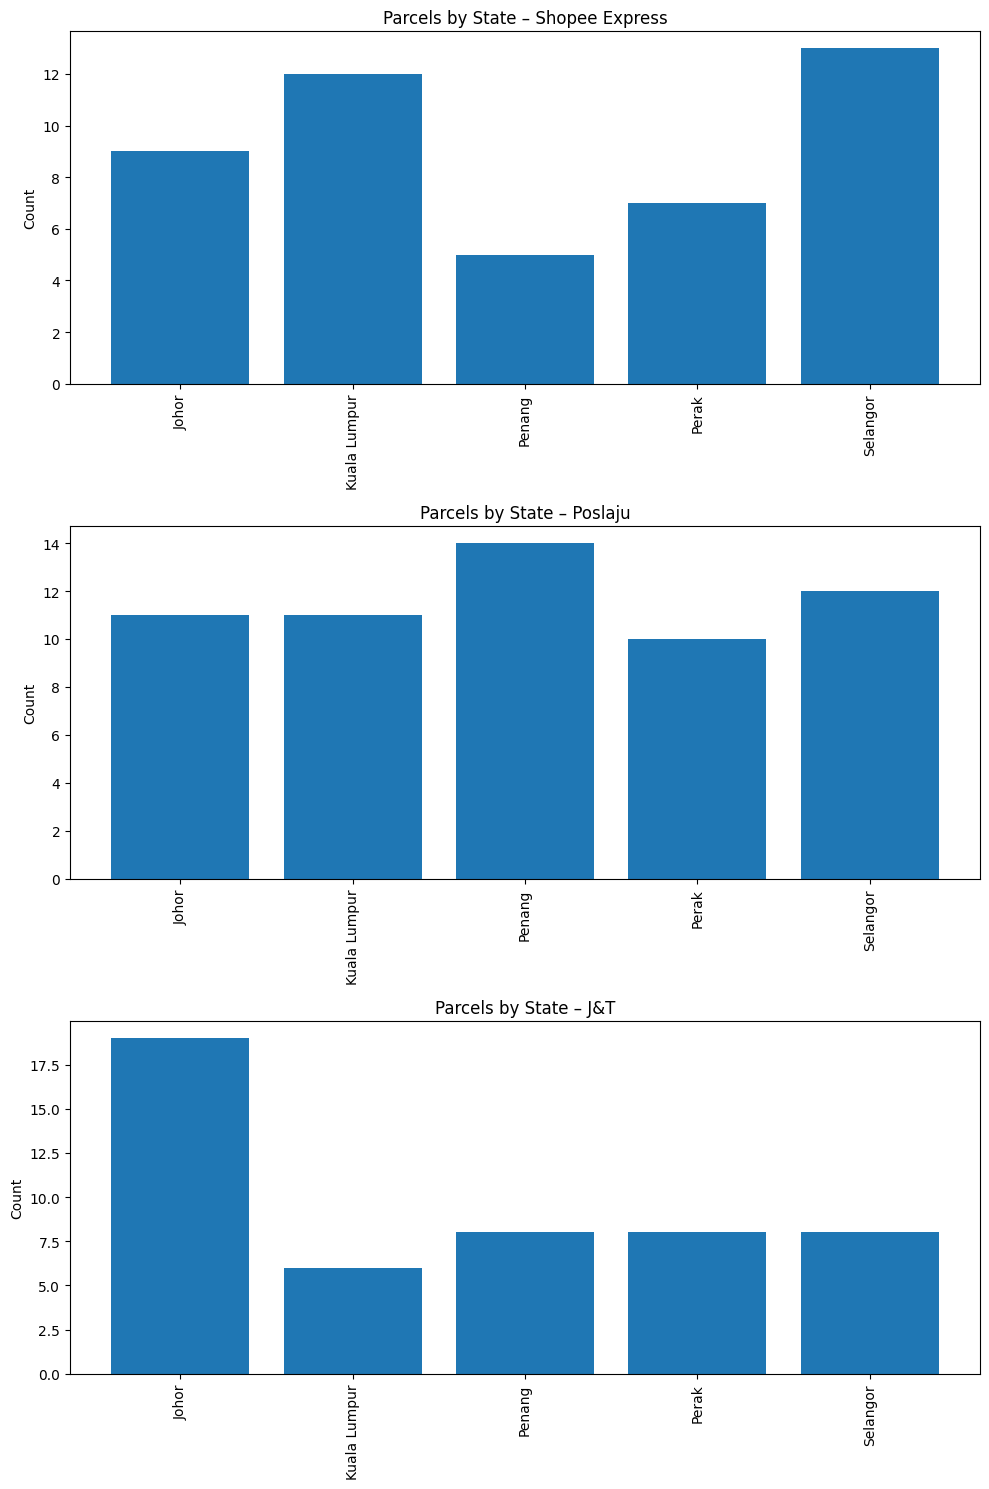

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("shopee_dataset_final.csv")

# Senarai courier unik
couriers = df["courier"].unique()

# Buat figure besar
plt.figure(figsize=(10, 15))

# Loop setiap courier
for i, courier in enumerate(couriers, 1):
    plt.subplot(len(couriers), 1, i)  # satu graf per baris
    
    # kira jumlah parcel per state untuk courier ini
    d = df[df["courier"] == courier].groupby("state").size()
    
    plt.bar(d.index, d.values)
    plt.title(f"Parcels by State – {courier}")
    plt.xticks(rotation=90)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

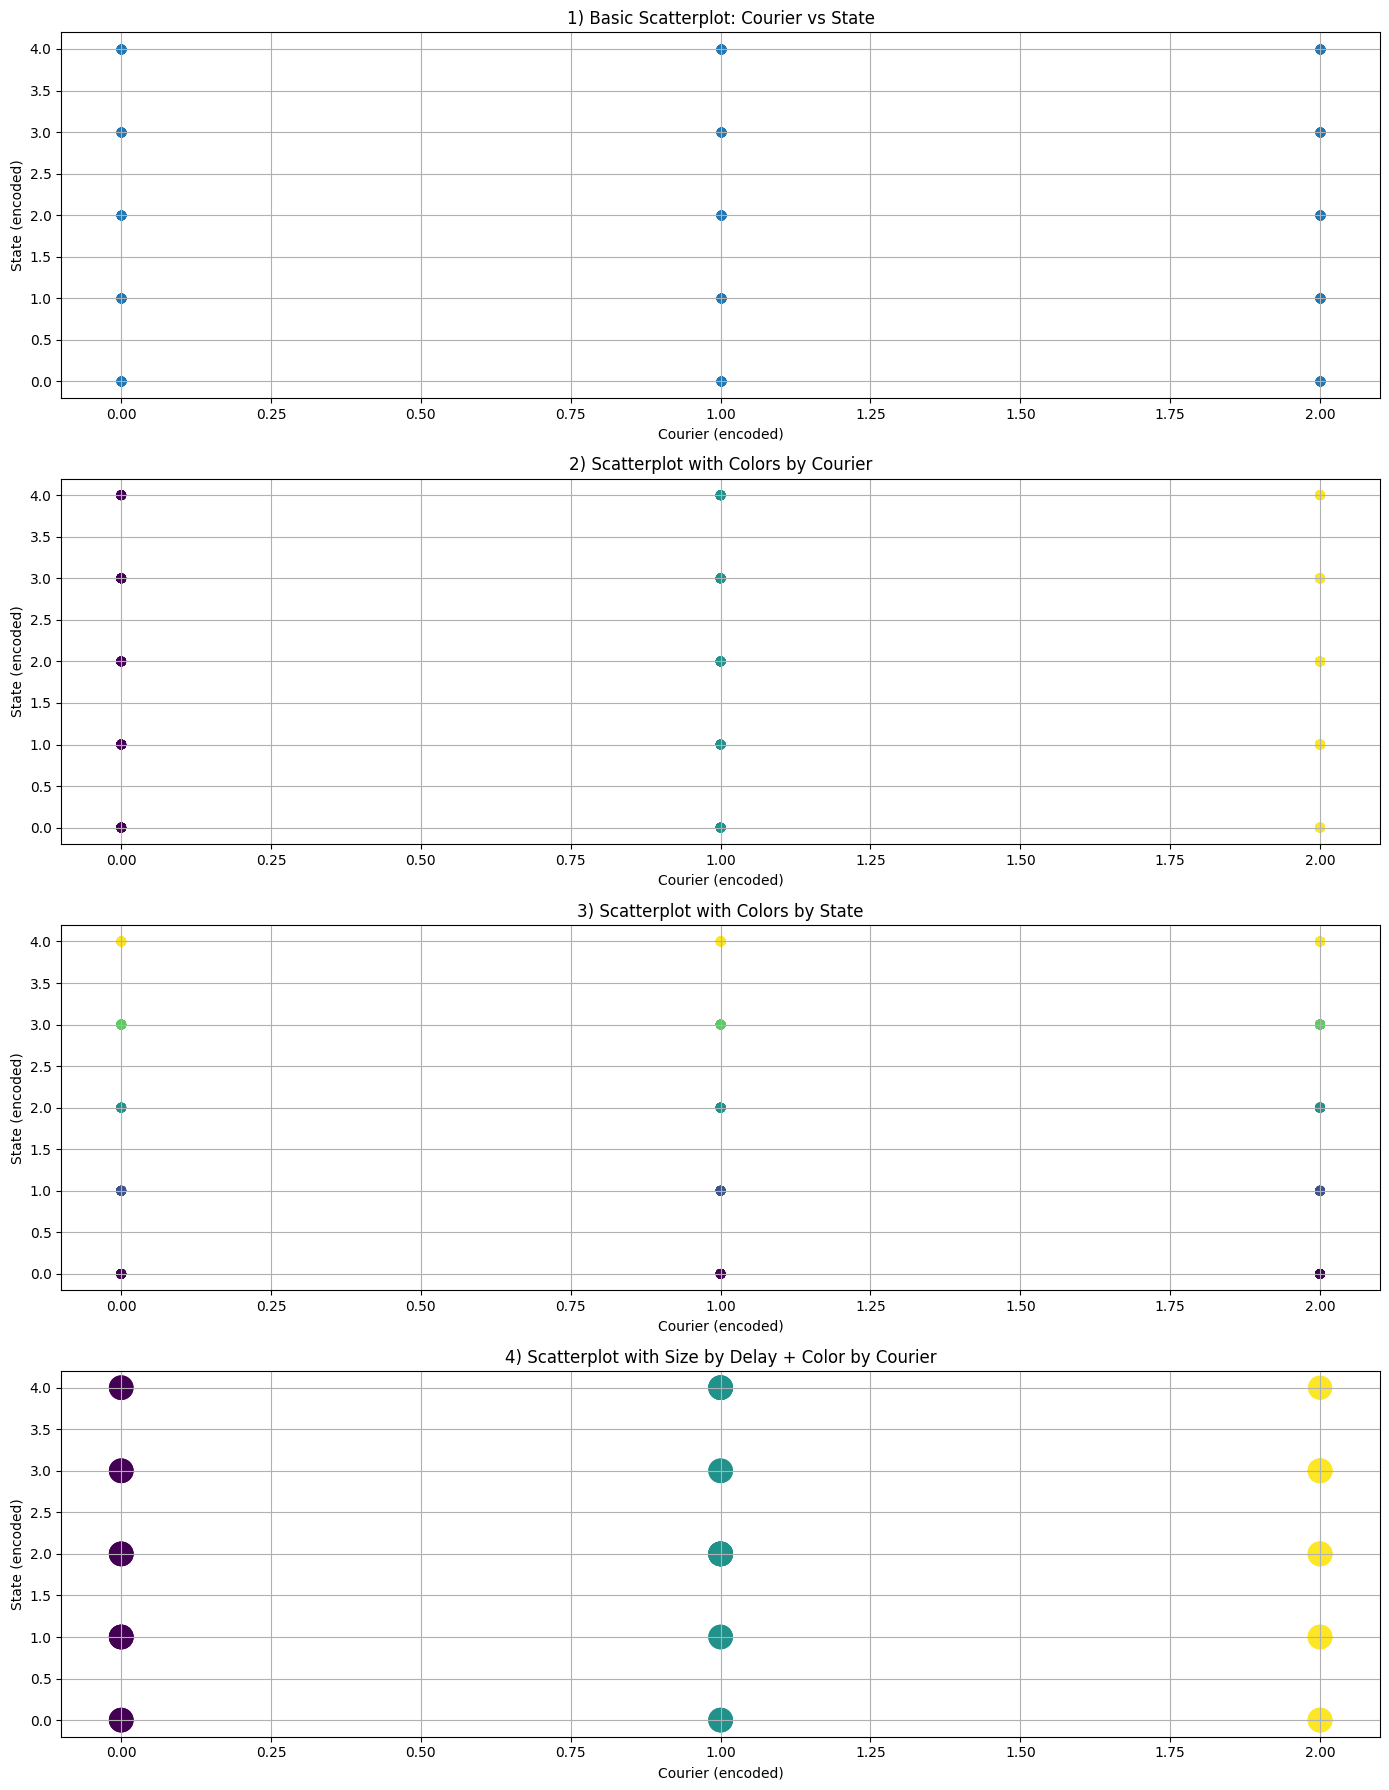


Courier Encodings:
          courier  courier_code
0  Shopee Express             2
1             J&T             0
2         Poslaju             1

State Encodings:
<bound method DataFrame.drop_duplicates of             state  state_code
0           Perak           3
1    Kuala Lumpur           1
2           Perak           3
3        Selangor           4
4          Penang           2
..            ...         ...
495        Penang           2
496         Perak           3
497      Selangor           4
498  Kuala Lumpur           1
499         Perak           3

[500 rows x 2 columns]>


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("shopee_dataset_final.csv")

# Encode kategori ke nombor
df["courier_code"] = df["courier"].astype("category").cat.codes
df["state_code"] = df["state"].astype("category").cat.codes

# Warna auto untuk kategori
courier_colors = df["courier_code"]
state_colors = df["state_code"]

plt.figure(figsize=(14,18))


# 1️⃣ BASIC SCATTERPLOT
plt.subplot(4,1,1)
plt.scatter(df["courier_code"], df["state_code"])
plt.title("1) Basic Scatterplot: Courier vs State")
plt.xlabel("Courier (encoded)")
plt.ylabel("State (encoded)")
plt.grid(True)


# 2️⃣ WARNA IKUT COURIER
plt.subplot(4,1,2)
plt.scatter(df["courier_code"], df["state_code"], c=courier_colors)
plt.title("2) Scatterplot with Colors by Courier")
plt.xlabel("Courier (encoded)")
plt.ylabel("State (encoded)")
plt.grid(True)


# 3️⃣ WARNA IKUT STATE
plt.subplot(4,1,3)
plt.scatter(df["courier_code"], df["state_code"], c=state_colors)
plt.title("3) Scatterplot with Colors by State")
plt.xlabel("Courier (encoded)")
plt.ylabel("State (encoded)")
plt.grid(True)


# 4️⃣ SIZE IKUT DELAY DAYS + WARNA IKUT COURIER
plt.subplot(4,1,4)
sizes = (df["delay_days"] + 1) * 40   # bigger dots for more delay
plt.scatter(df["courier_code"], df["state_code"], 
            c=courier_colors, s=sizes, alpha=0.7)
plt.title("4) Scatterplot with Size by Delay + Color by Courier")
plt.xlabel("Courier (encoded)")
plt.ylabel("State (encoded)")
plt.grid(True)


plt.tight_layout()
plt.show()

# Print encoding table
print("\nCourier Encodings:")
print(df[["courier","courier_code"]].drop_duplicates())

print("\nState Encodings:")
print(df[["state","state_code"]].drop_duplicates)

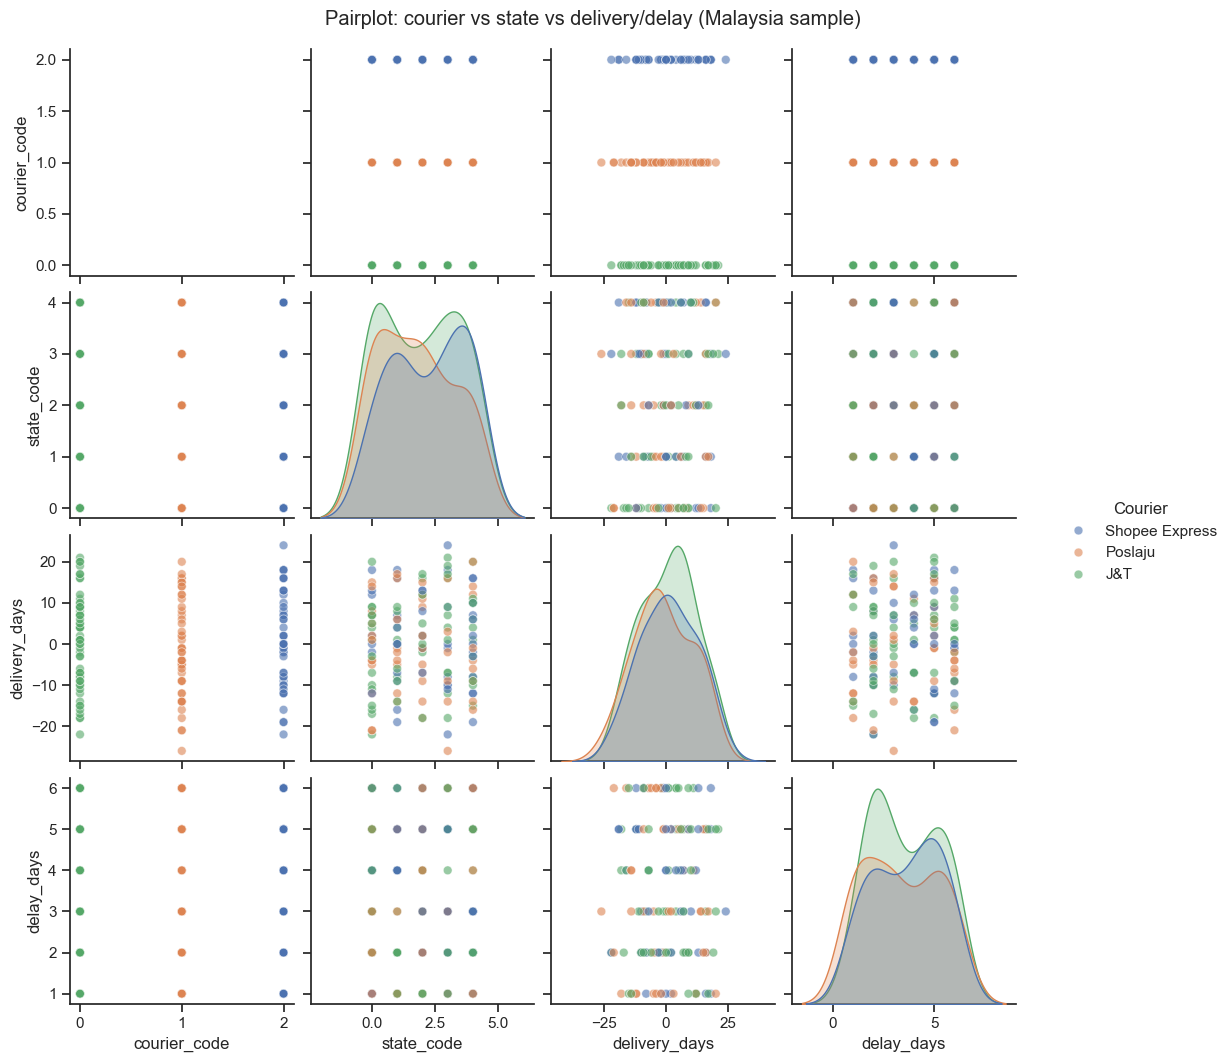


Courier -> courier_code
          courier  courier_code
0             J&T             0
1         Poslaju             1
2  Shopee Express             2

State -> state_code
          state  state_code
0         Johor           0
1  Kuala Lumpur           1
2        Penang           2
3         Perak           3
4      Selangor           4


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load
df = pd.read_csv("shopee_dataset_final.csv")

# parse dates (if not already parsed)
df['shipped_date'] = pd.to_datetime(df['shipped_date'])
df['delivered_date'] = pd.to_datetime(df['delivered_date'])

# create numeric features useful for plotting
df['delivery_days'] = (df['delivered_date'] - df['shipped_date']).dt.days
# delay_days already exists in the sample; but ensure numeric
df['delay_days'] = pd.to_numeric(df['delay_days'], errors='coerce').fillna(0).astype(int)

# optional: encode courier/state as codes (helpful if you want numeric columns)
df['courier_code'] = df['courier'].astype('category').cat.codes
df['state_code'] = df['state'].astype('category').cat.codes

# pick columns to include in pairplot (mix of numeric features)
plot_cols = ['courier_code', 'state_code', 'delivery_days', 'delay_days']

# prepare small dataframe for pairplot but keep 'courier' as hue (categorical)
df_plot = df[plot_cols + ['courier']].copy()

# set seaborn style
sns.set(style="ticks", font_scale=1)

# pairplot
g = sns.pairplot(
    df_plot,
    vars=plot_cols,
    hue='courier',
    diag_kind='kde',        # KDE on diagonal like your example
    plot_kws={'alpha':0.6, 's':40},  # alpha and marker size
    height=2.6,            # size of each subplot
    corner=False           # set True if you only want lower triangle
)

# move legend outside to avoid overlap
plt.subplots_adjust(right=0.85)
# put legend to the right
g._legend.set_title('Courier')
g._legend.set_bbox_to_anchor((1.02, 0.5))

plt.suptitle("Pairplot: courier vs state vs delivery/delay (Malaysia sample)", y=1.02)
plt.show()

# print encoding tables so you know which code = which courier/state
print("\nCourier -> courier_code")
print(df[['courier','courier_code']].drop_duplicates().sort_values('courier_code').reset_index(drop=True))

print("\nState -> state_code")
print(df[['state','state_code']].drop_duplicates().sort_values('state_code').reset_index(drop=True))

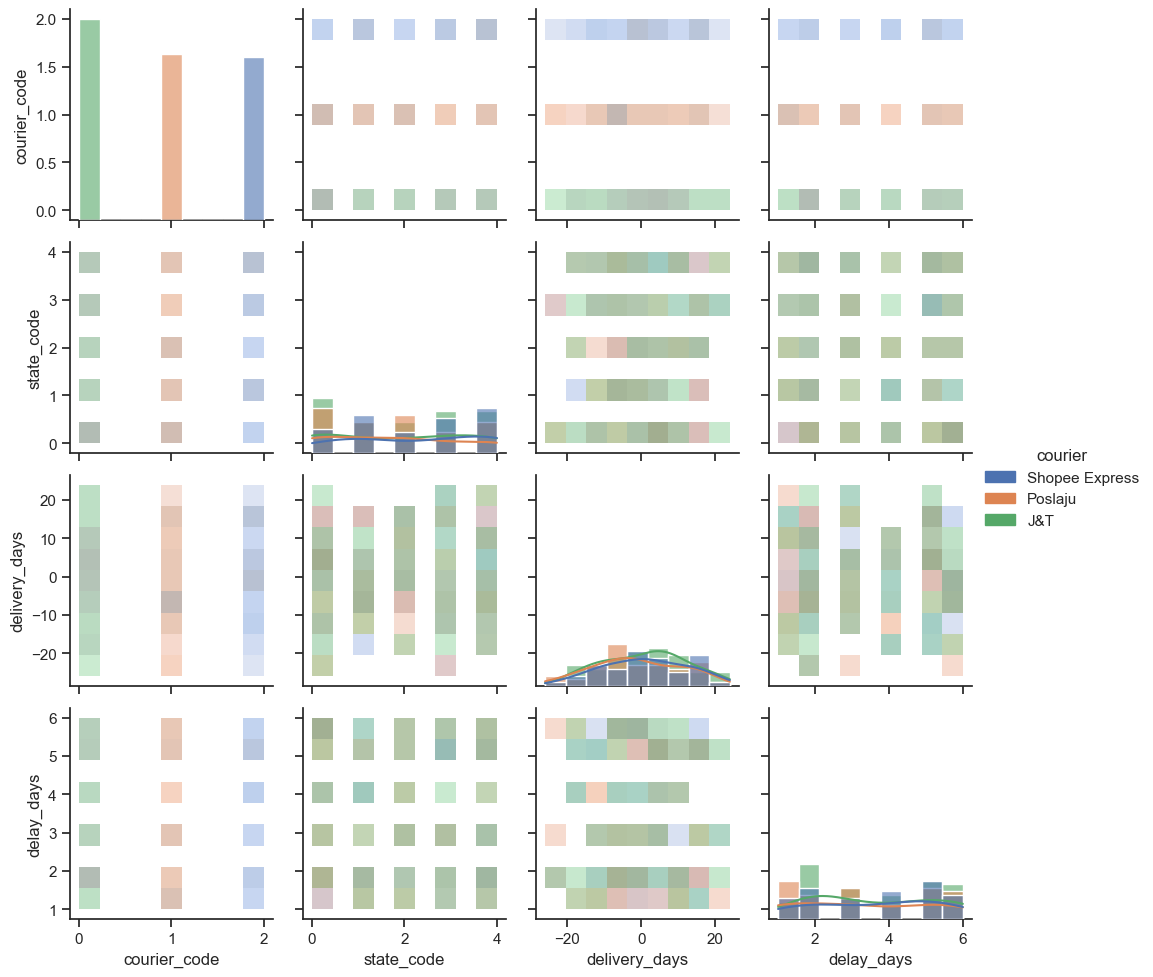

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("shopee_dataset_final.csv")

df['delivery_days'] = pd.to_datetime(df['delivered_date']) - pd.to_datetime(df['shipped_date'])
df['delivery_days'] = df['delivery_days'].dt.days

df['courier_code'] = df['courier'].astype('category').cat.codes
df['state_code'] = df['state'].astype('category').cat.codes

plot_cols = ['courier_code', 'state_code', 'delivery_days', 'delay_days']

sns.set(style="ticks")

g = sns.PairGrid(df, vars=plot_cols, hue="courier")

g.map_diag(sns.histplot, kde=True, alpha=0.6)   # semua panel = histogram
g.map_offdiag(sns.histplot, kde=True, alpha=0.4)

g.add_legend()
plt.show()